*This notebook contains an excerpt from the [Whirlwind Tour of Python](http://www.oreilly.com/programming/free/a-whirlwind-tour-of-python.csp) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/WhirlwindTourOfPython).*

*The text and code are released under the [CC0](https://github.com/jakevdp/WhirlwindTourOfPython/blob/master/LICENSE) license; see also the companion project, the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook).*


## A Preview of Data Science Tools

If you would like to spring from here and go farther in using Python for scientific computing or data science, there are a few packages that will make your life much easier.
This section will introduce and preview several of the more important ones, and give you an idea of the types of applications they are designed for.

If you are using Anaconda on your own machine and find you need to install these packages, then follow the instructions in the introductory section of notebook 6.1. All of these packages are already available for you to try using on NCC.

Let's take a brief look at each of these in turn.

## NumPy: Numerical Python

NumPy provides an efficient way to store and manipulate multi-dimensional dense arrays in Python.
The important features of NumPy are:

- It provides an ``ndarray`` structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
- It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

In the simplest case, NumPy arrays look a lot like Python lists.
For example, here is an array containing the range of numbers 1 to 9 (compare this with Python's built-in ``range()``):

In [1]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

NumPy's arrays offer both efficient storage of data, as well as efficient element-wise operations on the data.
For example, to square each element of the array, we can apply the "``**``" operator to the array directly:

In [2]:
x ** 2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional.
For example, here we will reshape our ``x`` array into a 3x3 array:

In [3]:
M = x.reshape((3, 3))
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can compute the transpose using ``.T``:

In [4]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

or a matrix-vector product using ``np.dot``:

In [5]:
np.dot(M, [5, 6, 7])

array([ 38,  92, 146])

and even more sophisticated operations like eigenvalue decomposition:

In [6]:
np.linalg.eigvals(M)

array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15])

Such linear algebraic manipulation underpins much of modern data analysis, particularly when it comes to the fields of machine learning and data mining.

We'll see many more details on NumPy in a future topic.

## Pandas: Labeled Column-oriented Data

Pandas is a much newer package than NumPy, and is in fact built on top of it.
What Pandas provides is a labeled interface to multi-dimensional data, in the form of a DataFrame object that will feel very familiar to users of R and related languages. You might find it easiest to think about a DataFrame as something akin to an Excel spreadsheet where you can label each of the rows and columns.
DataFrames in Pandas look something like this:

In [7]:
import pandas as pd
df = pd.DataFrame({'label': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'value': [1, 2, 3, 4, 5, 6]})
df

,label,value
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


The Pandas interface allows you to do things like select columns by name:

In [8]:
df['label']

0    A
1    B
2    C
3    A
4    B
5    C
Name: label, dtype: object

Apply string operations across string entries:

In [9]:
df['label'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: label, dtype: object

Apply aggregates across numerical entries:

In [10]:
df['value'].sum()

np.int64(21)

And, perhaps most importantly, do efficient database-style joins and groupings:

In [12]:
df.groupby('label').sum()

,value
label,
A,5
B,7
C,9


Here in one line we have computed the sum of all objects sharing the same label, something that is much more verbose (and much less efficient) using tools provided in Numpy and core Python.

Again, we'll see many more details on Pandas in a future topic.

## Matplotlib MatLab-style scientific visualization

Matplotlib is currently the most popular scientific visualization packages in Python.
Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

To use Matplotlib, we can start by enabling the inline mode (for use in the Jupyter notebook) and then importing the package as ``plt``"

In [13]:
# We can run this if using Jupyter notebook for interactive graphs
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # make graphs in the style of R's ggplot

Now let's create some data (as NumPy arrays, of course) and plot the results:

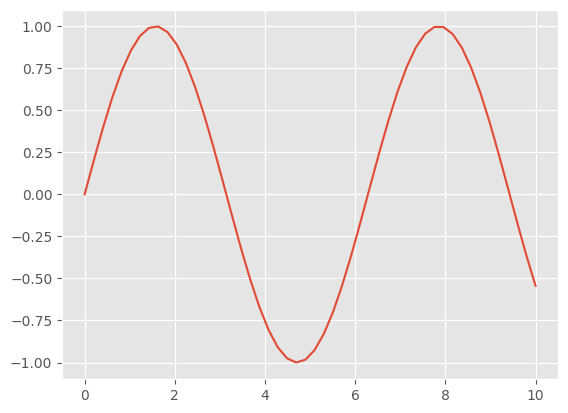

In [15]:
x = np.linspace(0, 10)  # range of values from 0 to 10
y = np.sin(x)           # sine of these values
plt.plot(x, y);         # plot as a line
plt.show()              # show the graph

We can also create interactive plots that we can pan and zoom for example. To do this we need to ensure we have the ipympl package installed to work with our Jupyterlab environment, and then we can use the widget mode as below:

In [16]:
%matplotlib widget

RuntimeError: 'widget' is not a recognised GUI loop or backend name

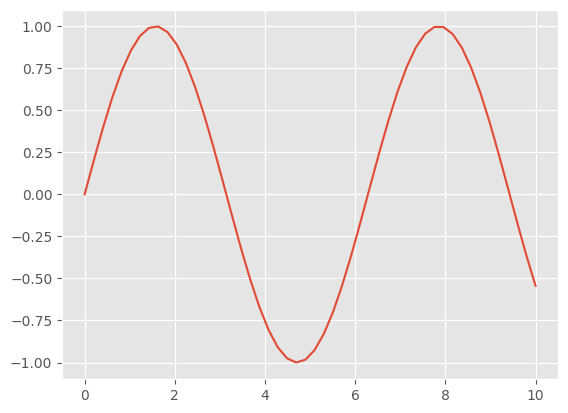

In [17]:
x = np.linspace(0, 10)  # range of values from 0 to 10
y = np.sin(x)           # sine of these values
plt.plot(x, y);         # plot as a line
plt.show()

If you run this code live, you will see an interactive plot that lets you pan, zoom, and scroll to explore the data.

This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib's online gallery](http://matplotlib.org/gallery.html).

## SciPy: Scientific Python

SciPy is a collection of scientific functionality that is built on NumPy.
The package began as a set of Python wrappers to well-known Fortran libraries for numerical computing, and has grown from there.
The package is arranged as a set of submodules, each implementing some class of numerical algorithms.
Here is an incomplete sample of some of the more important ones for data science:

- ``scipy.fftpack``: Fast Fourier transforms
- ``scipy.integrate``: Numerical integration
- ``scipy.interpolate``: Numerical interpolation
- ``scipy.linalg``: Linear algebra routines
- ``scipy.optimize``: Numerical optimization of functions
- ``scipy.sparse``: Sparse matrix storage and linear algebra
- ``scipy.stats``: Statistical analysis routines

For example, let's take a look at interpolating a smooth curve between some data

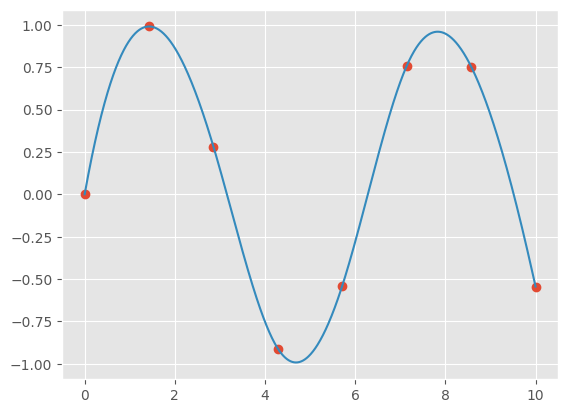

In [18]:
from scipy import interpolate

# choose eight points between 0 and 10
x = np.linspace(0, 10, 8)
y = np.sin(x)

# create a cubic interpolation function
func = interpolate.interp1d(x, y, kind='cubic')

# interpolate on a grid of 1,000 points
x_interp = np.linspace(0, 10, 1000)
y_interp = func(x_interp)

# plot the results
plt.figure()  # new figure
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp);
plt.show()

What we see is a smooth interpolation between the points.

## Other Data Science Packages

Built on top of these tools are a host of other data science packages, including general tools like [Scikit-Learn](http://scikit-learn.org) for machine learning and [Scikit-Image](http://scikit-image.org) for image analysis, as well as more domain-specific packages like [AstroPy](http://astropy.org) for astronomy and astrophysics, [NiPy](http://nipy.org/) for neuro-imaging, and many, many more.

No matter what type of scientific, numerical, or statistical problem you are facing, it's likely there is a Python package out there that can help you solve it.

That is everything for this topic, I hope this overview of functions, tools and packages for data science applications has been useful. You likely won't need all of these packages during this year, but in the years that follow, depending on which Computer Science modules you choose to take, you will definitely find yourself using the majority of them.

Head over to the final notebook of this topic and attempt the exercises. These will test your understanding of the content from this topic, but also build on content you've seen previously to make sure you are practicing using the core tools and techniques. 